- Phân loại khả năng hoàn trả của khách hàng

Mô tả ngắn về từng tính năng trong tập dữ liệu:

credit_policy: 1 nếu khách hàng đáp ứng đủ các tiêu chí đánh giá rủi ro tín dụng của Lending-Club.com, và 0 là ngược lại.

purpose: mục đích của khoản vay như: mở thẻ tín dụng, mua xe hơi, trang thiết bị gia đình…

int_rate: lãi xuất của khoản vay.

installment: số tiền trả góp hàng tháng mà người vay phải trả góp.

log_annual_inc: nhật ký thu nhập hàng năm của người vay

dti: hệ số nợ trên thu nhập (Debt to Income Ratio) là tỉ lệ phần trăm của tổng thu nhập hàng tháng để trả các khoản thanh toán nợ hàng tháng. Công thức: DTI= (Tổng các khoản thanh toán nợ hàng tháng)/(Tổng thu nhập hàng tháng)

fico: điểm FICO là điểm tín dụng của người vay. Các tổ chức Tài Chính, Ngân Hàng dựa vào điểm FICO của người vay để đánh giá rủi ro tín dụng và xác định xem có nên cấp tín dụng hay không.? . 300 – 629: tệ . 630 – 689: khá . 690 – 719: tốt . 720 – 850: xuất sắc

days_with_cr_line: Ngày được cấp hạn mức tín dụng của người vay.

revol_bal: Tín dụng quay vòng là một kiểu hạn mức tín dụng mà khách hàng trả một khoản phí cam kết cho một tổ chức tài chính để vay tiền và sau đó được phép sử dụng tiền khi cần thiết. Ví dụ: phổ biến nhất về tín dụng quay vòng là hạn mức tín dụng cá nhân.

revol_util: Tỉ lệ sử dụng nợ tín dụng là tỉ lệ phần trăm của tổng nợ tín dụng hiện có của người vay đang được sử dụng. Tỉ lệ sử dụng nợ tín dụng là một yếu tố được áp dụng bởi các cơ quan báo cáo tín dụng để tính điểm tín dụng của người vay.

inq_last_6mths: Số lượng các câu hỏi của người vay đối với tổ chức Tài Chính trong 6 tháng qua.

delinq_2yrs: Số lần người vay đã quá 30 ngày đến hạn thanh toán trong 2 năm qua.

pub_rec: Thông tin về lịch sử tín dụng của bên vay (báo cáo tín dụng) mà bên cho vay có thể sử dụng hợp pháp, để bác bỏ yêu cầu vay hoặc đơn xin vay tín dụng. Bao gồm những việc như phá sản, thanh toán trễ hạn và các khoản vay đã xóa bỏ trước đây.

not_fully_paid: thông tin cho biết khoản vay có được hoàn trả hay không(1: hoàn trả đầy đủ; 0: không hoàn trả đầy đủ)

0: Khoản vay chưa thanh toán đầy đủ

1: Khoản vay đã thanh toán đầy đủ

- Kết nối Colab với Driver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DNN-ML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DNN-ML


- Khai báo thư viện

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [ ]:
df = pd.read_csv("loan_data.csv")

1. Khai Phá Dữ liệu

In [ ]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37066 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      37066 non-null  int64  
 1   purpose            37066 non-null  object 
 2   int_rate           37066 non-null  float64
 3   installment        37066 non-null  float64
 4   log_annual_inc     37066 non-null  float64
 5   dti                36966 non-null  float64
 6   fico               37066 non-null  int64  
 7   days_with_cr_line  37066 non-null  int64  
 8   revol_bal          37066 non-null  int64  
 9   revol_util         37054 non-null  float64
 10  inq_last_6mths     37066 non-null  int64  
 11  delinq_2yrs        37032 non-null  float64
 12  pub_rec            37066 non-null  int64  
 13  not_fully_paid     37066 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.0+ MB


In [ ]:
df1.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [ ]:
df1.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,37066.0,37066.000000,37066.000000,3.706600e+04,36966.000000,37066.000000,37066.000000,37066.000000,37054.000000,37066.000000,37032.000000,37066.000000,37066.000000
mean,1.0,0.125959,461.676085,8.508181e+04,19.906781,713.174095,37601.141855,5257.108051,0.281656,11528.100011,0.365854,0.118329,0.725247
std,0.0,0.048869,286.609282,9.152286e+04,17.405359,36.889934,2826.487211,15219.806597,0.664489,19638.251184,0.434548,0.328961,0.446396
min,1.0,0.053000,30.510000,0.000000e+00,0.000000,664.000000,22251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.085000,248.710000,5.000000e+04,11.910000,684.000000,36251.000000,0.000000,0.000000,2.000000,0.014000,0.000000,0.000000
50%,1.0,0.117000,383.070000,7.000000e+04,18.270000,704.000000,38169.000000,1.000000,0.000000,6258.500000,0.303000,0.000000,1.000000
75%,1.0,0.156000,627.470000,1.000000e+05,25.490000,734.000000,39356.000000,1743.250000,0.377000,15116.750000,0.570000,0.000000,1.000000
max,1.0,0.308000,1671.880000,9.300000e+06,999.000000,850.000000,42795.000000,504828.000000,23.000000,652794.000000,15.000000,5.000000,1.000000


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.isna().sum()

credit_policy          0
purpose                0
int_rate               0
installment            0
log_annual_inc         0
dti                  100
fico                   0
days_with_cr_line      0
revol_bal              0
revol_util            12
inq_last_6mths         0
delinq_2yrs           34
pub_rec                0
not_fully_paid         0
dtype: int64

In [ ]:
df1

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,debt_consolidation,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1
37062,1,debt_consolidation,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1
37063,1,small_business,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1
37064,1,debt_consolidation,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1


In [ ]:
df1.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [ ]:
print(df1['credit_policy'].value_counts())
print(len(set(df1['credit_policy'])))

credit_policy
1    37066
Name: count, dtype: int64
1


In [ ]:
print(df1['purpose'].value_counts())
print(len(set(df1['purpose'])))

purpose
debt_consolidation    19595
credit_card            9113
home_improvement       2847
other                  2508
major_purchase          905
medical                 466
house                   410
car                     385
vacation                314
small_business          272
moving                  236
renewable_energy         15
Name: count, dtype: int64
12


In [ ]:
print(df1['int_rate'].value_counts())
print(len(set(df1['int_rate'])))

int_rate
0.131    1862
0.082    1695
0.096    1379
0.088    1303
0.124    1204
         ... 
0.130       3
0.107       3
0.209       2
0.199       2
0.224       1
Name: count, Length: 94, dtype: int64
94


In [ ]:
print(df1['installment'].value_counts())
print(len(set(df1['installment'])))

installment
1225.24    157
308.00     115
314.25     105
317.12     103
814.70     101
          ... 
939.15       1
696.22       1
581.18       1
735.33       1
272.62       1
Name: count, Length: 8848, dtype: int64
8848


In [ ]:
print(df1['dti'].value_counts())
print(len(set(df1['dti'])))

dti
0.00      57
16.80     30
12.00     28
8.40      27
18.74     27
          ..
117.71     1
53.35      1
68.31      1
87.31      1
58.12      1
Name: count, Length: 4896, dtype: int64
4996


In [ ]:
print(df1['fico'].value_counts())
print(len(set(df1['fico'])))

fico
684    2280
674    2206
694    2109
689    2105
704    2096
679    2035
699    1963
669    1960
709    1942
664    1926
714    1843
719    1614
724    1595
729    1338
734    1244
739    1048
744    1032
749     809
754     757
759     693
764     632
769     612
774     523
779     469
784     428
789     328
794     325
804     239
799     237
809     196
814     131
819     114
824      90
829      57
834      38
839      23
844      17
850      12
Name: count, dtype: int64
38


In [ ]:
print(df1['days_with_cr_line'].value_counts())
print(len(set(df1['days_with_cr_line'])))

days_with_cr_line
38596    327
38930    321
38565    318
39295    295
38961    292
        ... 
26696      1
24563      1
24532      1
24167      1
24381      1
Name: count, Length: 603, dtype: int64
603


In [ ]:
print(df1['log_annual_inc'].value_counts())
print(len(set(df1['log_annual_inc'])))

log_annual_inc
60000.0     1379
50000.0     1131
65000.0     1079
80000.0      988
75000.0      952
            ... 
81548.0        1
50040.0        1
35280.0        1
660000.0       1
32072.0        1
Name: count, Length: 4138, dtype: int64
4138


In [ ]:
print(df1['revol_bal'].value_counts())
print(len(set(df1['revol_bal'])))

revol_bal
0        18134
1         6671
2         1867
3          518
4           47
         ...  
14571        1
11177        1
13851        1
20842        1
3293         1
Name: count, Length: 8664, dtype: int64
8664


In [ ]:
print(df1['revol_util'].value_counts())
print(len(set(df1['revol_util'])))

revol_util
0.000    23337
1.000     2761
2.000      679
3.000      245
4.000      109
         ...  
0.997        1
0.987        1
0.912        1
0.986        1
0.919        1
Name: count, Length: 1023, dtype: int64
1035


In [ ]:
print(df1['inq_last_6mths'].value_counts())
print(len(set(df1['inq_last_6mths'])))

inq_last_6mths
0        6777
1        2486
2         756
3         186
4          40
         ... 
52245       1
7390        1
8709        1
3722        1
636         1
Name: count, Length: 18212, dtype: int64
18212


In [ ]:
print(df1['pub_rec'].value_counts())
print(len(set(df1['pub_rec'])))

pub_rec
0    32736
1     4285
2       38
3        4
4        2
5        1
Name: count, dtype: int64
6


In [ ]:
print(df1['delinq_2yrs'].value_counts())
print(len(set(df1['delinq_2yrs'])))

delinq_2yrs
0.000     8884
1.000     1010
2.000      218
3.000       87
0.370       65
          ... 
1.029        1
1.043        1
1.107        1
15.000       1
1.016        1
Name: count, Length: 1033, dtype: int64
1067


<ipython-input-84-eee534eabfec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='not_fully_paid', palette=colors)


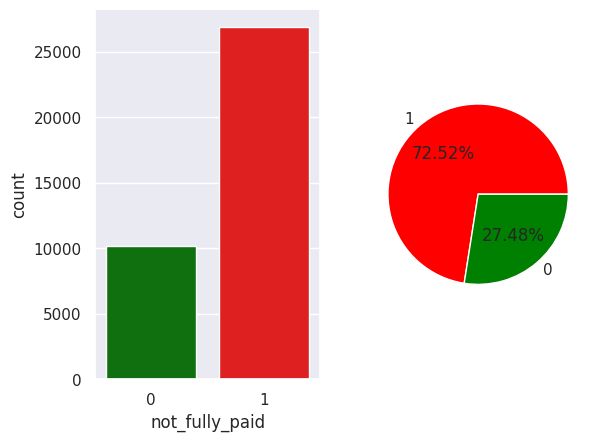

In [ ]:
plt.subplot(1, 2, 1)
colors = ['green', 'red']
sns.countplot(data=df1, x='not_fully_paid', palette=colors)
plt.subplot(1, 2, 2)
plt.pie(df1['not_fully_paid'].value_counts(), labels=['1', '0'], autopct='%.02f%%', colors=colors[::-1])
plt.show()

<ipython-input-85-66ccf7cfb1b5>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_i.set_xticklabels(x_ticks, rotation=90, fontsize=12)


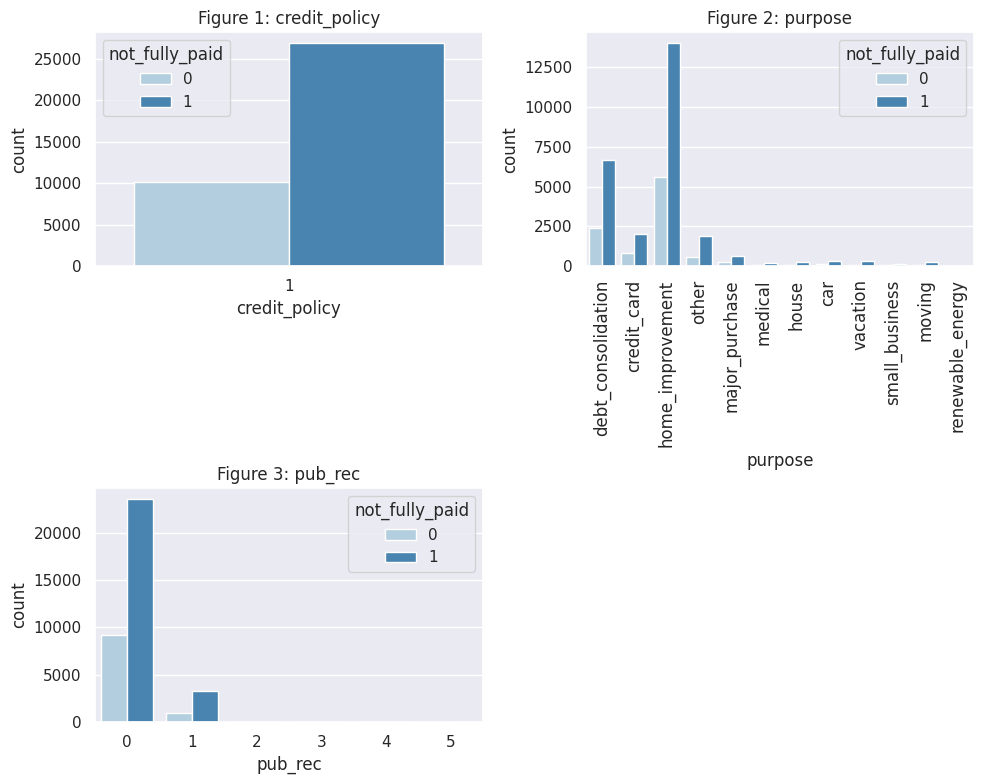

In [ ]:
categori = ['credit_policy', 'purpose', 'pub_rec']
n_rows, n_cols, index = 2, 2, 0
fix, ax = plt.subplots(nrows=n_rows, ncols= n_cols, figsize = (10, 8))
for row in range(0, n_rows):
    for col in range(0, n_cols):
      if index < len(categori):
          ax_i = ax[row, col]
          sns.countplot(data=df1, x=categori[index], hue='not_fully_paid', palette= "Blues", ax= ax_i)
          if categori[index] == 'purpose':
              tmp = df1[categori[index]].value_counts().index.to_list()
              x_ticks = [i for i in tmp]
              ax_i.set_xticklabels(x_ticks, rotation=90, fontsize=12)
          ax_i.set_title(f"Figure {index + 1}: {categori[index]}")
          index += 1
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

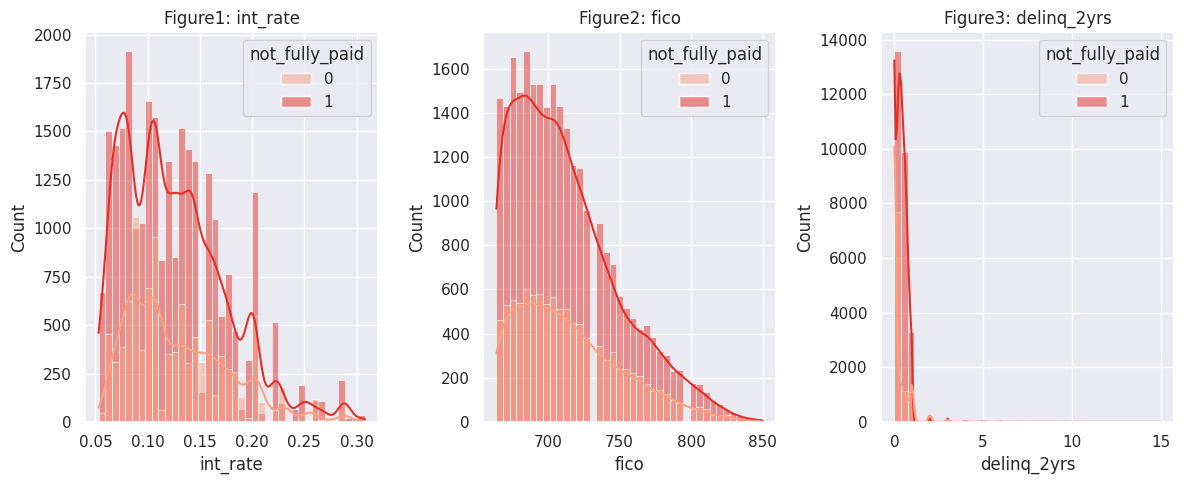

In [ ]:
n_rows = 1
n_cols = 3
num_features = ['int_rate', 'fico', 'delinq_2yrs']
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 5))

for row in range(0, n_rows):
    for col in range(0, n_cols):
        index = row * n_cols + col
        if index < len(num_features):
            ax_i = ax[col]
            sns.histplot(data=df1, x= num_features[index], hue= "not_fully_paid", palette= "Reds", ax= ax_i, bins= 40, kde= True)
            ax_i.set_title(f"Figure{index + 1}: {num_features[index]}")
plt.tight_layout()
plt.show()

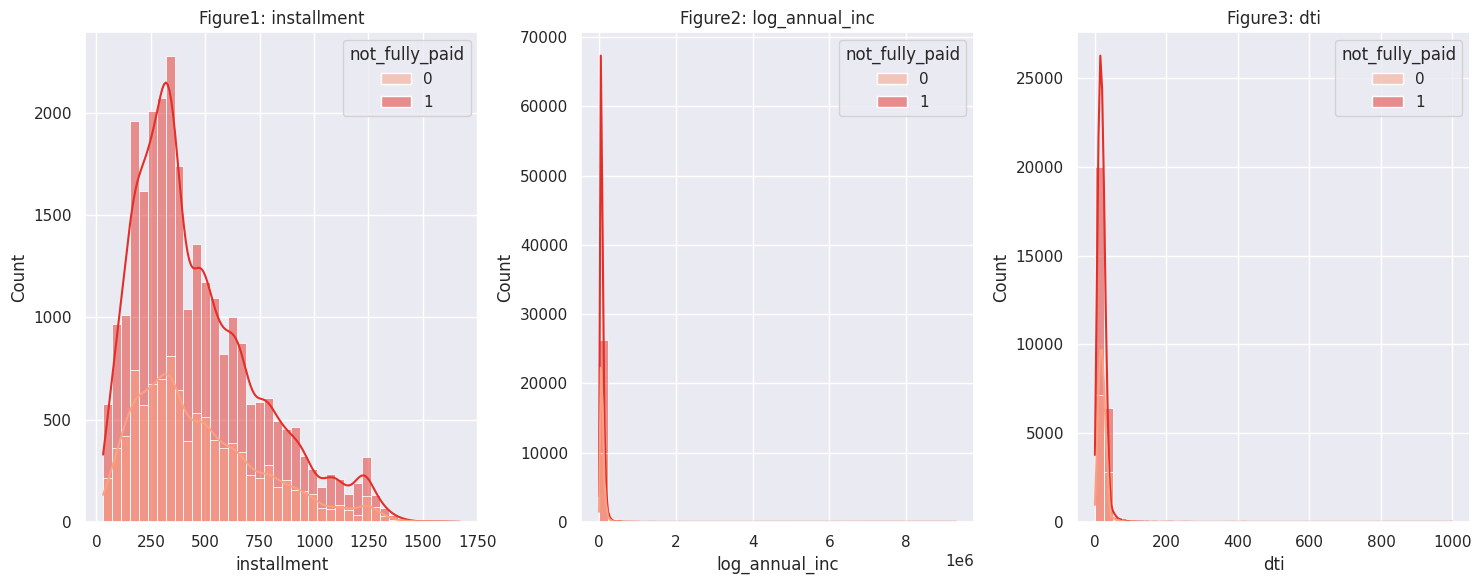

In [ ]:
n_rows = 1
n_cols = 3
num_features = ['installment', 'log_annual_inc', 'dti']
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6))

for row in range(0, n_rows):
    for col in range(0, n_cols):
        index = row * n_cols + col
        if index < len(num_features):
            ax_i = ax[col]
            sns.histplot(data=df1, x= num_features[index], hue= "not_fully_paid", palette= "Reds", ax= ax_i, bins= 40, kde= True)
            ax_i.set_title(f"Figure{index + 1}: {num_features[index]}")
plt.tight_layout()
plt.show()

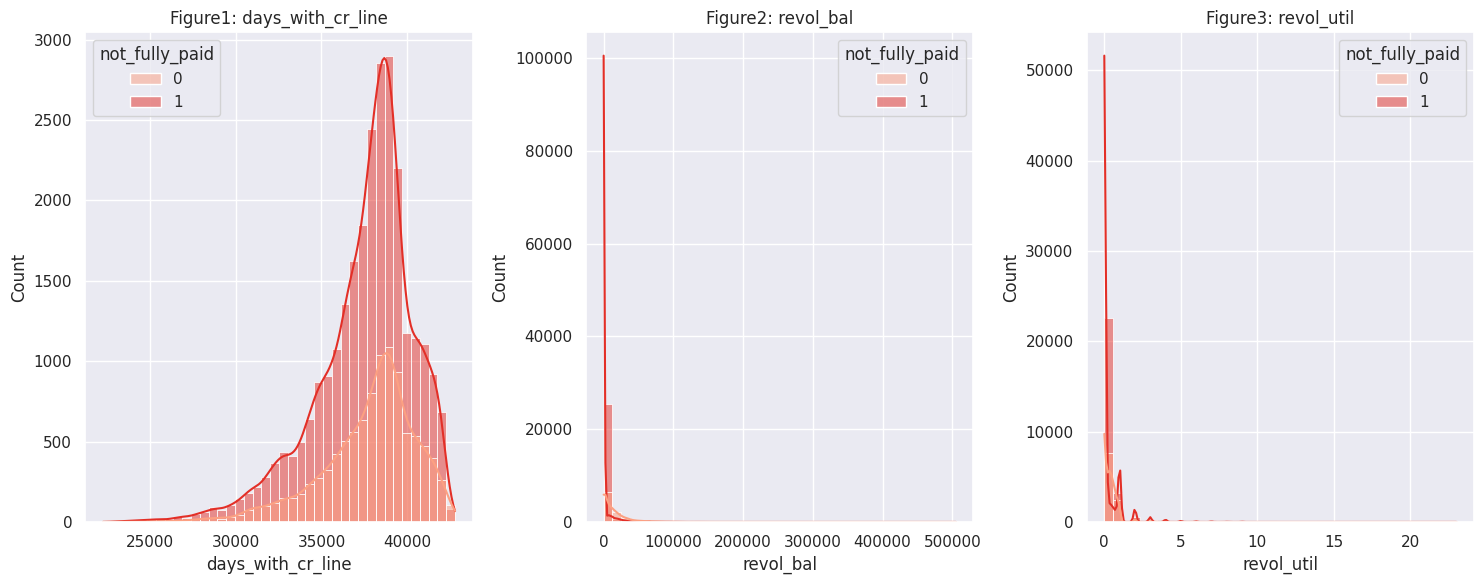

In [ ]:
n_rows = 1
n_cols = 3
num_features = ['days_with_cr_line', 'revol_bal', 'revol_util']
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 6))

for row in range(0, n_rows):
    for col in range(0, n_cols):
        index = row * n_cols + col
        if index < len(num_features):
            ax_i = ax[col]
            sns.histplot(data=df1, x= num_features[index], hue= "not_fully_paid", palette= "Reds", ax= ax_i, bins= 40, kde= True)
            ax_i.set_title(f"Figure{index + 1}: {num_features[index]}")
plt.tight_layout()
plt.show()

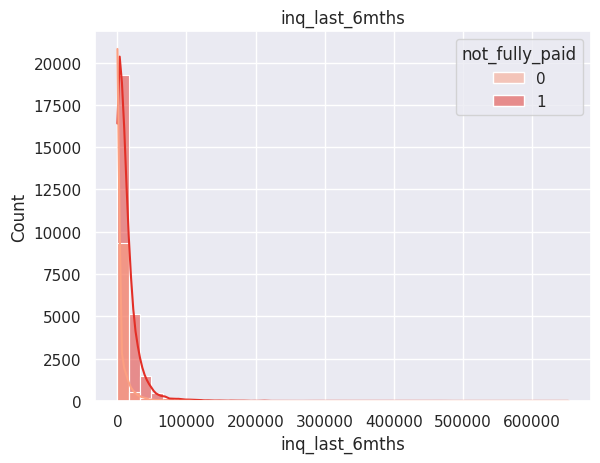

In [ ]:
plt.title('inq_last_6mths')
sns.histplot(data=df1, x= 'inq_last_6mths', hue= "not_fully_paid", palette= "Reds", bins= 40, kde= True)
plt.show()

Ngoại lai

<ipython-input-90-9637a00e8d4e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF, x='not_fully_paid', y = 'installment',palette="Set2")
<ipython-input-90-9637a00e8d4e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF1, x='not_fully_paid', y = 'fico',palette="Set2")
<ipython-input-90-9637a00e8d4e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF2, x='not_fully_paid', y = 'log_annual_inc',palette="Set2")


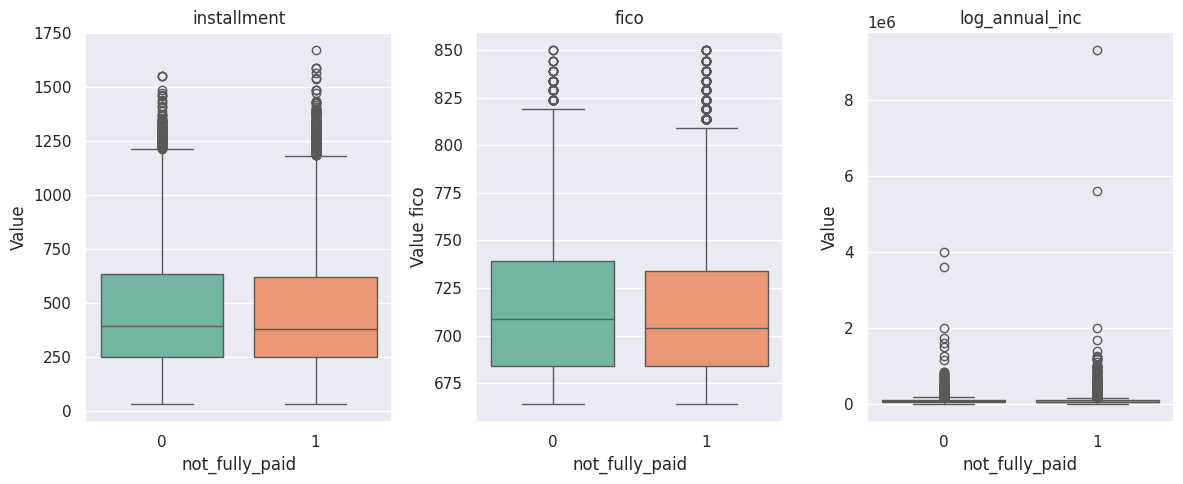

In [ ]:
dataF = pd.DataFrame(
    {
        "installment" : df1['installment'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('installment')
sns.boxplot(data=dataF, x='not_fully_paid', y = 'installment',palette="Set2")
plt.ylabel('Value')

dataF1 = pd.DataFrame(
    {
        'fico' : df1['fico'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplot(1, 3, 2)
plt.title('fico')
sns.boxplot(data=dataF1, x='not_fully_paid', y = 'fico',palette="Set2")
plt.ylabel('Value fico')

dataF2 = pd.DataFrame(
    {
        'log_annual_inc' : df1['log_annual_inc'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplot(1, 3, 3)
plt.title('log_annual_inc')
sns.boxplot(data=dataF2, x='not_fully_paid', y = 'log_annual_inc',palette="Set2")
plt.ylabel('Value')
plt.tight_layout()
plt.show()

<ipython-input-91-f09c0e31d9b9>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-91-f09c0e31d9b9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF3, x='not_fully_paid', y='inq_last_6mths', palette="Set2")
<ipython-input-91-f09c0e31d9b9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF4, x='not_fully_paid', y='days_with_cr_line',palette="Set2")


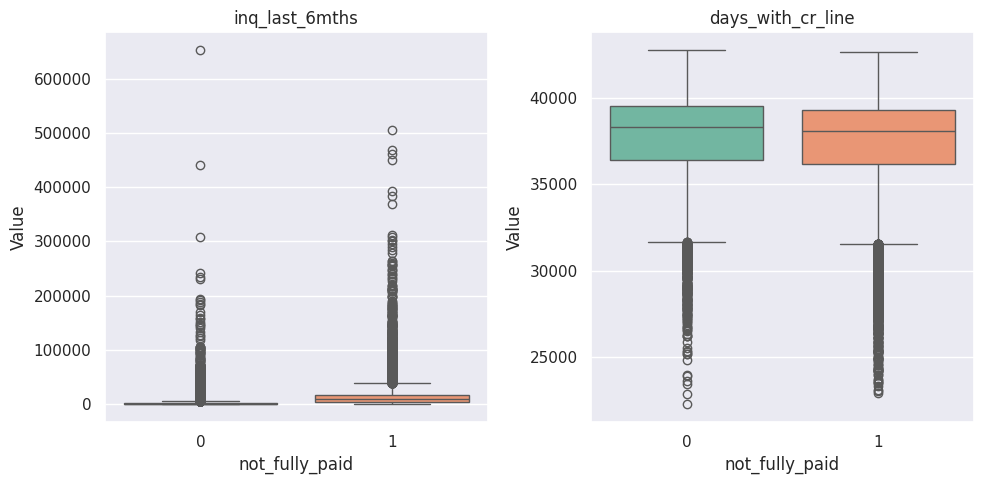

In [ ]:
dataF3 = pd.DataFrame(
    {
        'inq_last_6mths' : df1['inq_last_6mths'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('inq_last_6mths')
sns.boxplot(data=dataF3, x='not_fully_paid', y='inq_last_6mths', palette="Set2")
plt.ylabel('Value')

dataF4 = pd.DataFrame(
    {
        'days_with_cr_line' : df1['days_with_cr_line'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplot(1, 2, 2)
plt.title('days_with_cr_line')
sns.boxplot(data=dataF4, x='not_fully_paid', y='days_with_cr_line',palette="Set2")
plt.ylabel('Value')
plt.tight_layout()
plt.show()

<ipython-input-92-5046660b1c2e>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-92-5046660b1c2e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF5, x='not_fully_paid', y='revol_bal', palette="Set2")
<ipython-input-92-5046660b1c2e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF6, x='not_fully_paid', y='delinq_2yrs', palette="Set2")


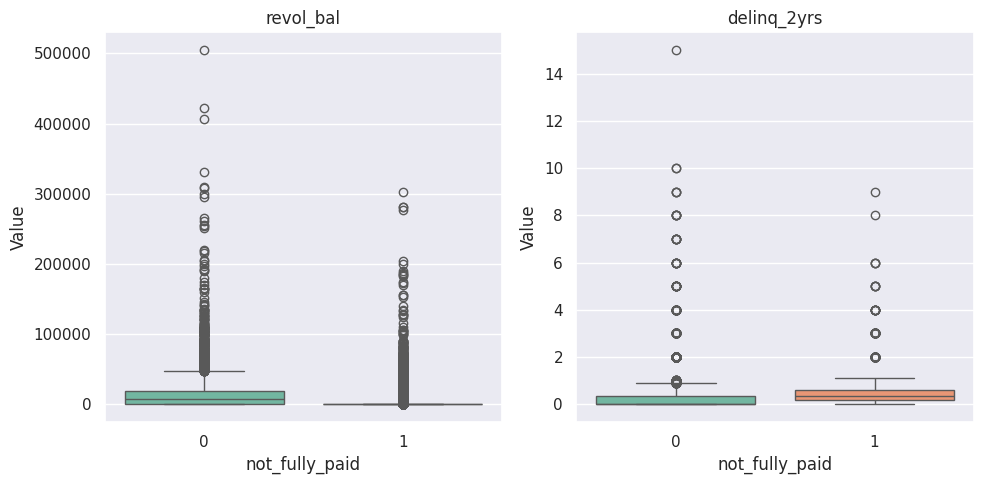

In [ ]:
dataF5 = pd.DataFrame(
    {
        'revol_bal' : df1['revol_bal'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('revol_bal')
sns.boxplot(data=dataF5, x='not_fully_paid', y='revol_bal', palette="Set2")
plt.ylabel('Value')

dataF6 = pd.DataFrame(
    {
        'delinq_2yrs' : df1['delinq_2yrs'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplot(1, 2, 2)
plt.title('delinq_2yrs')
sns.boxplot(data=dataF6, x='not_fully_paid', y='delinq_2yrs', palette="Set2")
plt.ylabel('Value')
plt.tight_layout()
plt.show()

<ipython-input-93-ac5f1072d41a>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)
<ipython-input-93-ac5f1072d41a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF7, x='not_fully_paid', y='int_rate',palette="Set2")
<ipython-input-93-ac5f1072d41a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataF8, x='not_fully_paid', y='revol_util',palette="Set2")
<ipython-input-93-ac5f1072d41a>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

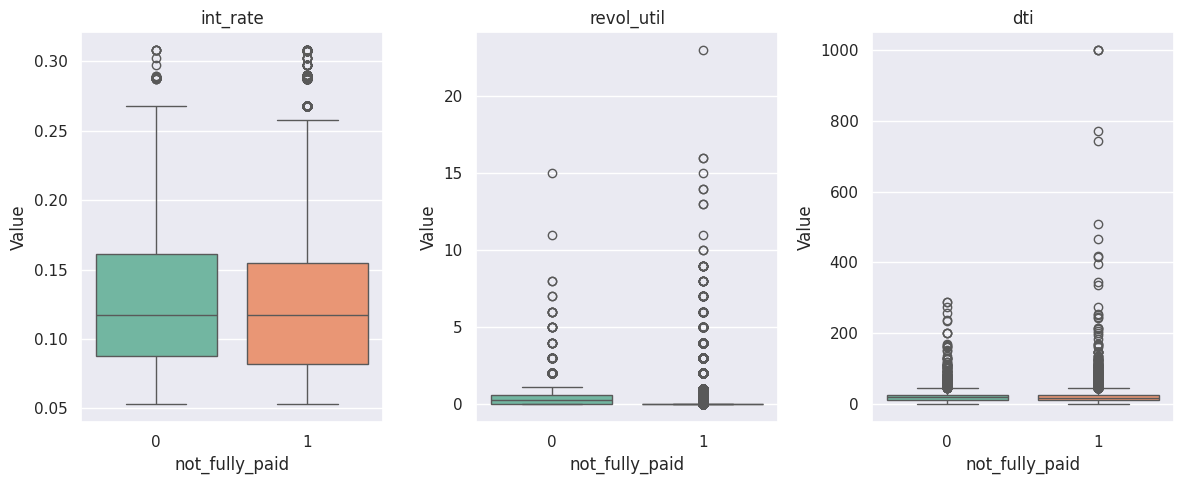

In [ ]:
dataF7 = pd.DataFrame(
    {
        'int_rate' : df1['int_rate'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplots(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.title('int_rate')
sns.boxplot(data=dataF7, x='not_fully_paid', y='int_rate',palette="Set2")
plt.ylabel('Value')

dataF8 = pd.DataFrame(
    {
        'revol_util' : df1['revol_util'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)
plt.subplot(1, 3, 2)
plt.title('revol_util')
sns.boxplot(data=dataF8, x='not_fully_paid', y='revol_util',palette="Set2")
plt.ylabel('Value')

dataF9 = pd.DataFrame(
    {
        'dti' : df1['dti'],
        'not_fully_paid' : df1['not_fully_paid']
    }
)

plt.subplot(1, 3, 3)
plt.title('dti')
sns.boxplot(data=dataF9, x='not_fully_paid', y='dti',palette="Set2")
plt.ylabel('Value')
plt.tight_layout()
plt.show()

Ma trận tương quan giữa các feature

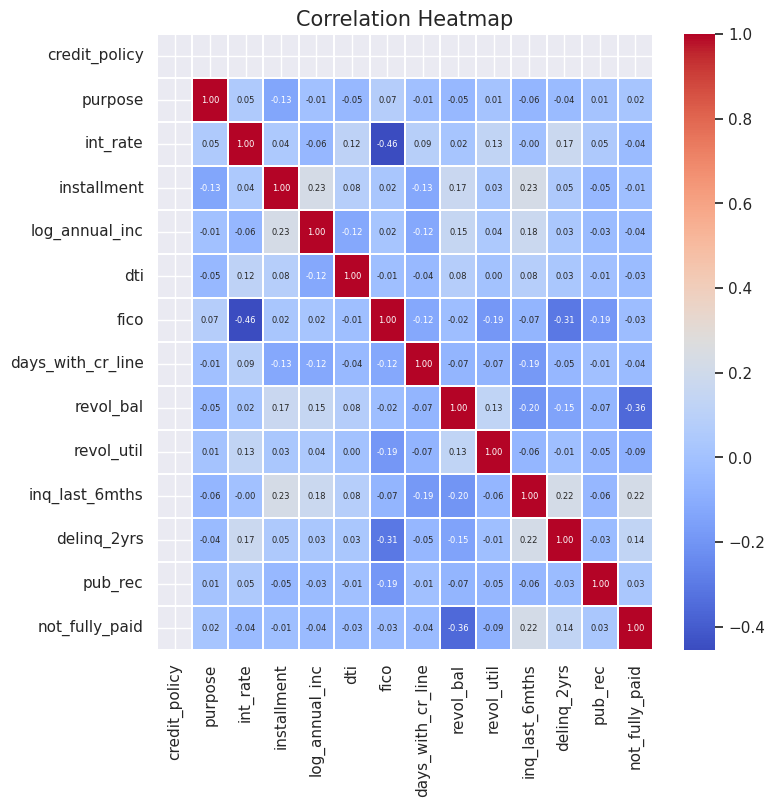

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df1['purpose'] = encode.fit_transform(df1['purpose'])
correlation_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f', annot_kws={'size': 6},
            linecolor='white', linewidths=0.05)
ax.set_title('Correlation Heatmap', fontsize=15)
fig.show()

2. Tiền xử lý dữ liệu

In [ ]:
df2 = df.copy()

Loại bỏ cột không cần thiết và xử lý dữ liệu NaN

In [ ]:
df2.drop('credit_policy', axis=1, inplace=True)

In [ ]:
df2['dti'].fillna(df2['dti'].median(), inplace = True)
df2['revol_util'].fillna(df2['revol_util'].mean(), inplace = True)
df2['delinq_2yrs'].fillna(df2['revol_bal'].mean(), inplace = True)

Mã hóa

In [ ]:
!pip install category_encoders

Chia bộ dữ liệu thành dữ liệu vào và nhãn

In [ ]:
x = df2.drop('not_fully_paid', axis=1)
y = df2['not_fully_paid']

In [ ]:
x

,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0
1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0
2,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0
3,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0
4,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37061,debt_consolidation,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0
37062,debt_consolidation,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0
37063,small_business,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0
37064,debt_consolidation,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0


In [ ]:
import category_encoders as ce
import pickle
encoder = ce.OneHotEncoder(cols=['purpose'], return_df=True)
encoder.fit(x)
pickle.dump(encoder, open('OneHotEncoder.pkl', 'wb'))
x = encoder.transform(x)

In [ ]:
x

,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,...,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,0,0,0,0,0,0,0,0,0,...,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0
1,0,1,0,0,0,0,0,0,0,0,...,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0
2,1,0,0,0,0,0,0,0,0,0,...,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0
3,1,0,0,0,0,0,0,0,0,0,...,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0
4,0,0,1,0,0,0,0,0,0,0,...,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0,0,1,0,0,0,0,0,0,0,...,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0
37062,0,0,1,0,0,0,0,0,0,0,...,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0
37063,0,0,0,0,0,1,0,0,0,0,...,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0
37064,0,0,1,0,0,0,0,0,0,0,...,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0


Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
sc = MinMaxScaler(feature_range=(0, 1))
# sc = RobustScaler()
sc.fit(x)
pickle.dump(sc, open('MinMaxScaler.pkl', 'wb'))
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [ ]:
x

,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,...,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285030,0.016129,0.015716,0.161290,0.760027,0.039118,0.029304,0.000005,0.000951,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.511634,0.005914,0.030160,0.376344,0.666667,0.023568,0.020696,0.000003,0.000190,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.459866,0.017742,0.016126,0.161290,0.687403,0.040966,0.024652,0.000000,0.000000,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.155066,0.004301,0.032102,0.430108,0.877044,0.016865,0.009826,0.000003,0.000000,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.329176,0.003871,0.023754,0.268817,0.794100,0.014965,0.011130,0.000002,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.464417,0.017957,0.024685,0.161290,0.761488,0.000000,0.000000,0.039809,0.000129,0.0
37062,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.503171,0.013441,0.011742,0.430108,0.447479,0.000000,0.000000,0.002647,0.000006,0.0
37063,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.491626,0.008065,0.009029,0.161290,0.906688,0.000006,0.000000,0.000974,0.000007,0.0
37064,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.260740,0.003449,0.058178,0.618280,0.841511,0.000000,0.000000,0.023003,0.000055,0.0


In [ ]:
x.shape, y.shape

((37066, 23), (37066,))

Chia bộ dữ liệu thành tập train và test với tỉ lệ 80% để học, 20% để kiểm thử

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train.shape, y_train.shape

((29652, 23), (29652,))

In [ ]:
x_test.shape, y_test.shape

((7414, 23), (7414,))

3. Xây dựng mô hình cho bài toán phân loại & đánh giá mô hình

Model

- RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
y_pred = model.predict(x_test)
def plot_classification_results(y_test, y_pred):
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title("Confusion Matrix")
    sns.heatmap(cm, annot=True, fmt='d', annot_kws={'size': 10})

    # Vẽ ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
from collections import Counter
couter = Counter(y_test)
print(couter)

Counter({1: 5336, 0: 2078})


In [ ]:
# from sklearn.metrics import f1_score
# from sklearn.model_selection import learning_curve

# def f1_scorer(estimator, X, y):
#     y_pred = estimator.predict(X)
#     return f1_score(y, y_pred)
# # Tính learning curve
# train_sizes, train_scores, test_scores = learning_curve(
#     model, x_train, y_train, scoring='f1', n_jobs=-1,
#     train_sizes=np.linspace(0.1, 1.0, 10)
# )

# # Tính toán giá trị trung bình và độ lệch chuẩn của train/test scores
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_std = np.std(test_scores, axis=1)

# # Vẽ Learning Curve
# plt.figure()
# plt.title("Learning Curve for RandomForestClassifier using F1 Score")
# plt.xlabel("Training set size")
# plt.ylabel("F1 Score")
# plt.grid()

# # Vẽ khoảng tin cậy cho training scores
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# # Vẽ khoảng tin cậy cho validation scores
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1,
#                  color="g")

# # Vẽ đường biểu diễn cho training scores
# plt.plot(train_sizes, train_scores_mean, '-', color="r",
#          label="Training F1 score")
# # Vẽ đường biểu diễn cho validation scores
# plt.plot(train_sizes, test_scores_mean, '-', color="g",
#          label="Validation F1 score")

# plt.legend(loc="best")
# plt.show()

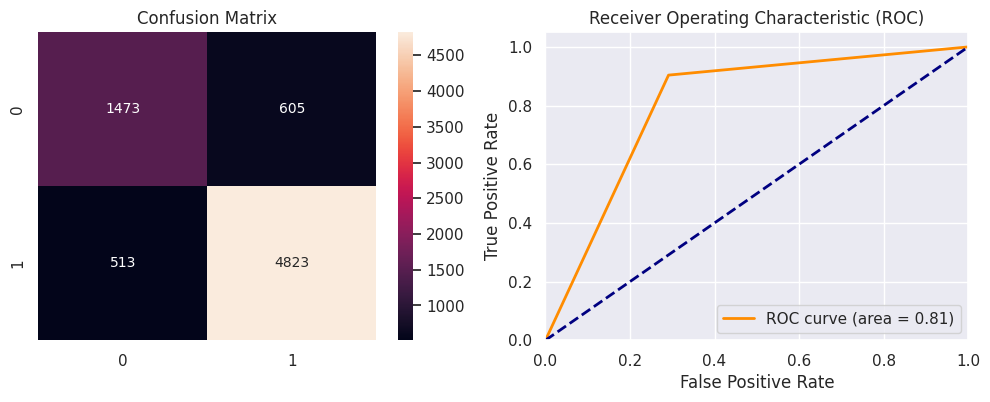

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      2078
           1       0.89      0.90      0.90      5336

    accuracy                           0.85      7414
   macro avg       0.82      0.81      0.81      7414
weighted avg       0.85      0.85      0.85      7414



In [ ]:
plot_classification_results(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

4. Model cuối cùng

- Tìm kiếm tham số tối ưu cho mô hình RandomForest

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import make_scorer, recall_score

# scorer = make_scorer(recall_score, pos_label=0)
# param_grid = {
#     'n_estimators' : [95, 100, 105, 110, 200],
#     'min_samples_split' : [None, 2, 5]
# }

# rf_classifier = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(estimator=rf_classifier, param_grid= param_grid, cv=5, scoring=scorer)

# grid_search.fit(x_train, y_train)
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy found (recall_score): ", grid_search.best_score_)

In [ ]:
# best_params = grid_search.best_params_
# model = RandomForestClassifier(n_estimators=best_params['n_estimators'],
#                                min_samples_split=best_params['min_samples_split'], random_state=42)
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)

In [ ]:
# plot_classification_results(y_test, y_pred)
# print(classification_report(y_test, y_pred))